<a href="https://colab.research.google.com/github/Uros-Males/Minimization_Problem_On_Identical_Machines_Analysis/blob/main/Neural_Network_SMOTE_Multi_Classs_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#IN PROGRESS....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import time
import keras

df = pd.read_csv('/content/sample_data/C-instances-runtime-analysis.csv')
print(df.shape[0])

shuffled = df.sample(frac=1).reset_index()

columns_dont_want = ['y', 'index', 'inst.name','type', 'CPLEXStatus'] #cple
select = [x for x in shuffled.columns if x not in columns_dont_want]

#print(shuffled_temp)


X = shuffled.loc[:, select]

y = shuffled.loc[:,'y']
#print(X.head())
names = ['subtype', 'class', 'indeks', 'n', 'm', 'n/m', '(n/m)^2', '(n/m)^3', 'm/n', '(m/n)^2',
         '(m/n)^3', 'av.length', 'std.dev', 'median', 'range', 'min', 'max', 'k']
#print(names[1])



8750


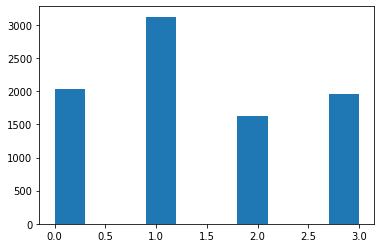

In [2]:
y_new = []
for val in y:
  if(val<10):
    y_new.append(0)
  elif(10 <= val and val <100):
    y_new.append(1)
  elif(100<=val and val<1000):
    y_new.append(2)
  else:
    y_new.append(3)

shuffled['y_new'] = y_new
#print(shuffled.head())
y_encoded = shuffled.loc[:,'y_new']
y_new = np.array(y_new)
plt.hist(y_new)
plt.show()
X_modified = X
#X_modified = X.drop(['n/m', '(n/m)^2', '(n/m)^3', 'm/n', '(m/n)^2', '(m/n)^3', 'max', 'av.length'], axis = 1)
#print(X_modified.shape[1])

In [3]:

shuffled_temp=[]
for i in range(shuffled.shape[0]):
  if(shuffled.loc[i]['n/m']==2):
    shuffled_temp.append(shuffled.loc[i])

shuffled.drop(shuffled.loc[df['n/m']==2].index, inplace=True)
print(shuffled.shape[0])

X = shuffled.loc[:, select]

y = shuffled.loc[:,'y']
    

columns_dont_want = ['y', 'index', 'inst.name','type', 'CPLEXStatus'] #cple
select = [x for x in shuffled.columns if x not in columns_dont_want]

shuffled_temp = pd.DataFrame(shuffled_temp, columns = select)

columns_dont_want = ['y', 'index', 'inst.name','type', 'CPLEXStatus', 'y_new'] #cple
select = [x for x in shuffled.columns if x not in columns_dont_want]

X_temp = shuffled_temp.loc[:, select]

y_temp = shuffled_temp.loc[:,'y_new']

from imblearn.over_sampling import SMOTE

smote_on_3 = 50
oversample = SMOTE(sampling_strategy={3:380})
X_temp, y_temp = oversample.fit_resample(X_temp, y_temp)
from collections import Counter
counter = Counter(y_temp)





8050


In [4]:
columns_dont_want = ['y', 'index', 'inst.name','type', 'CPLEXStatus'] #cple
select = [x for x in shuffled.columns if x not in columns_dont_want]
shuffled = pd.DataFrame(shuffled, columns=select)
X_temp["y_new"] = y_temp

#for i in range(X_temp.shape[0]):
 # X_temp.iloc[i].insert("y_new", y_temp[i])
  #print(X_temp.iloc[i])
print(shuffled.shape[0])
shuffled = pd.concat([shuffled, X_temp], ignore_index=True)
#print(shuffled.shape[0])

8050


In [5]:
#X, y_encoded
shuffled = shuffled.sample(frac=1).reset_index()

columns_dont_want = ['y', 'index', 'inst.name','type', 'CPLEXStatus', 'y_new'] #cple
select = [x for x in shuffled.columns if x not in columns_dont_want]

#print(shuffled_temp)


X_modified = shuffled.loc[:, select]
print(shuffled.shape[0])

y_encoded = shuffled.loc[:,'y_new']

9113


In [6]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

l_encode = LabelEncoder()
l_encode.fit(y_encoded)
y_encoded = l_encode.transform(y_encoded)
y_encoded = to_categorical(y_encoded)
y_encoded

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

classifier = Sequential()
classifier.add(Dense(8, input_dim = X_modified.shape[1], activation='relu'))
#classifier.add(Dense(8, activation = 'relu'))

classifier.add(Dense(16, activation = 'relu'))

#classifier.add(Dense(32, activation = 'relu'))
#classifier.add(Dense(32, activation = 'relu'))
#classifier.add(Dense(16, activation = 'relu'))

classifier.add(Dense(32, activation='relu'))

classifier.add(Dense(64, activation='relu'))

classifier.add(Dense(16, activation='relu'))

classifier.add(Dense(4, activation = 'softmax'))
classifier.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 152       
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 dense_2 (Dense)             (None, 32)                544       
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 16)                1040      
                                                                 
 dense_5 (Dense)             (None, 4)                 68        
                                                                 
Total params: 4,060
Trainable params: 4,060
Non-trainabl

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_modified, y_encoded, random_state=0, train_size = 0.83)

X_train = scaler.fit_transform(X_train)
X_test_copy = X_test
print(X_test_copy.head(10))
X_test = scaler.fit_transform(X_test)

      subtype  class  indeks    n   m   n/m  (n/m)^2     (n/m)^3       m/n  \
6867       12      2       1  108  12  9.00  81.0000  729.000000  0.111111   
4585       12      7       1  198  22  9.00  81.0000  729.000000  0.111111   
558         8      5       6  180  45  4.00  16.0000   64.000000  0.250000   
8611        2      3       1   72  32  2.25   5.0625   11.390625  0.444444   
5716       12      5      10  162  18  9.00  81.0000  729.000000  0.111111   
2606        4      7       2  176  64  2.75   7.5625   20.796875  0.363636   
2505       12      4       9  162  18  9.00  81.0000  729.000000  0.111111   
1479        8      3       7  200  50  4.00  16.0000   64.000000  0.250000   
1283       11      6       5  144  24  6.00  36.0000  216.000000  0.166667   
4900       12      4       4   72   8  9.00  81.0000  729.000000  0.111111   

       (m/n)^2   (m/n)^3   av.length     std.dev  median  range  min   max  \
6867  0.012346  0.001372   56.064816   24.096489    52.5     80

In [9]:
#classifier.fit(X_train, y_train, batch_size = 64, epochs = 20, verbose = 1)
#scores = classifier.evaluate(X_test, y_test)
#for i, m in enumerate(classifier.metrics_names):
#    print("\n%s: %.3f"% (m, scores[i]))
print(X_test_copy.iloc[0]['subtype'])

12.0


Epoch 1/600
473/473 [==============================] - 4s 5ms/step - loss: 0.9325 - accuracy: 0.6080 - val_loss: 0.6449 - val_accuracy: 0.7239
Epoch 2/600
473/473 [==============================] - 2s 4ms/step - loss: 0.5876 - accuracy: 0.7423 - val_loss: 0.5208 - val_accuracy: 0.7697
Epoch 3/600
473/473 [==============================] - 2s 4ms/step - loss: 0.5100 - accuracy: 0.7743 - val_loss: 0.4823 - val_accuracy: 0.7935
Epoch 4/600
473/473 [==============================] - 2s 5ms/step - loss: 0.4878 - accuracy: 0.7867 - val_loss: 0.4910 - val_accuracy: 0.7761
Epoch 5/600
473/473 [==============================] - 2s 5ms/step - loss: 0.4744 - accuracy: 0.7958 - val_loss: 0.4638 - val_accuracy: 0.7910
Epoch 6/600
473/473 [==============================] - 2s 4ms/step - loss: 0.4629 - accuracy: 0.7957 - val_loss: 0.4497 - val_accuracy: 0.7948
Epoch 7/600
473/473 [==============================] - 2s 5ms/step - loss: 0.4532 - accuracy: 0.8007 - val_loss: 0.4756 - val_accuracy: 0.7839

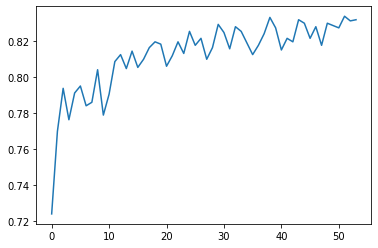

In [10]:
from keras.metrics import accuracy
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 15, 
                                        restore_best_weights = True)
  
history = classifier.fit(X_train, y_train, batch_size = 16, 
                    epochs = 600, validation_data =(X_test, y_test), 
                    callbacks =[earlystopping])
plt.plot(history.history['val_accuracy'])



In [11]:
from keras.metrics import accuracy
#test_size = X_test.shape[0]
pred = classifier.predict(X_test)
#print(pred)
pred_ = np.argmax(pred, axis = 1)
#print(pred_)
pred_ = l_encode.inverse_transform(pred_)

true_y = l_encode.inverse_transform(np.argmax(to_categorical(y_test), axis = 1)[:,1])


#for i,j in zip(pred_, true_y):
#    print("Predicted: {}, True: {}".format(i, j))

cnt = 0
cnt_correct = 0

for i in range(len(pred_)):
  cnt += 1
  if(pred_[i] == true_y[i]):
    cnt_correct += 1
  if(pred_[i] == 0 and true_y[i]== 3):
    #print(X_test[i])
    for j in range(len(names)):
      print(names[j]+"->"+str(X_test_copy.iloc[i][names[j]]))
    print("------------------------------------------------------------------")

print(f'accuracy: {(cnt_correct/cnt)*100:.2f}%')

subtype->1.0
class->7.0
indeks->10.0
n->180.0
m->90.0
n/m->2.0
(n/m)^2->4.0
(n/m)^3->8.0
m/n->0.5
(m/n)^2->0.25
(m/n)^3->0.125
av.length->706.877808
std.dev->175.294418
median->749.5
range->848.0
min->256.0
max->1104.0
k->154.0
------------------------------------------------------------------
accuracy: 83.29%


accuracy: 83.29%


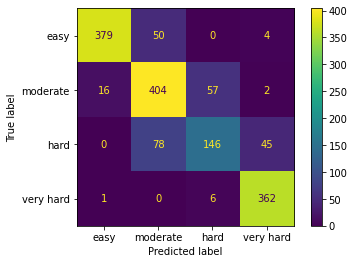

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#for i in range(len(pred_)):
#  print(true_y[i])
#print(confusion_matrix(true_y, pred_, labels=[0, 1, 2, 3]))
cm = confusion_matrix(true_y, pred_, labels=[0, 1, 2, 3])
cmd = ConfusionMatrixDisplay(cm, display_labels=['easy','moderate', 'hard', 'very hard'])
#plt.subplot(1, 2, 1)
cmd.plot()
print(f'accuracy: {(cnt_correct/cnt)*100:.2f}%')

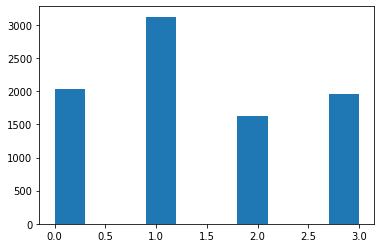

In [13]:
y_new = np.array(y_new)
plt.hist(y_new)
#plt.title('0->[0,2000) : 1->[2000,99999]')
plt.show()

ROC AUC score: 0.8769244178030814


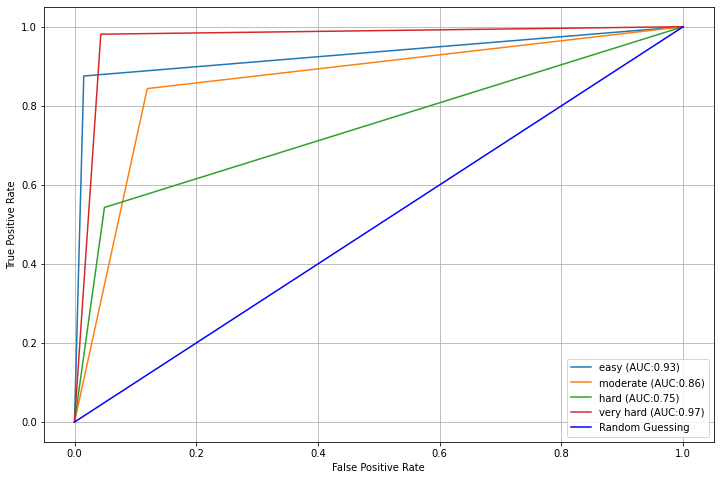

In [14]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


target= ['easy', 'moderate', 'hard', 'very hard']

fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(true_y, pred_))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.grid()
plt.show()